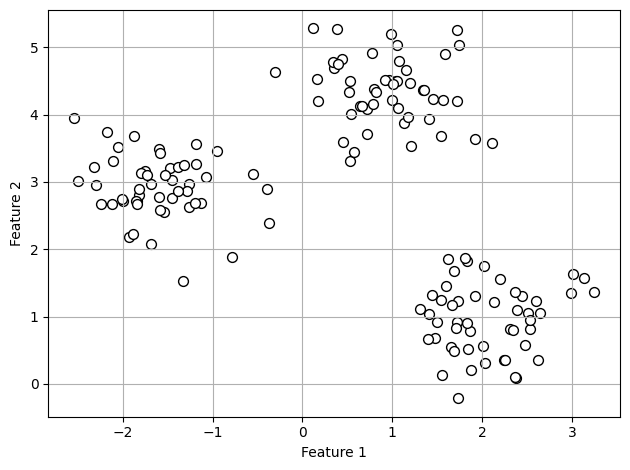

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150,
n_features=2,
centers=3,
cluster_std=0.5,
shuffle=True,
random_state=0)
import matplotlib.pyplot as plt
plt.scatter(X[:, 0],
X[:, 1],
c='white',
marker='o',
edgecolor='black',
s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.tight_layout()
plt.show()

In [3]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y_km=km.fit_predict(X)

In [4]:
print(f'Distortion: {km.inertia_:.2f}')

Distortion: 72.48


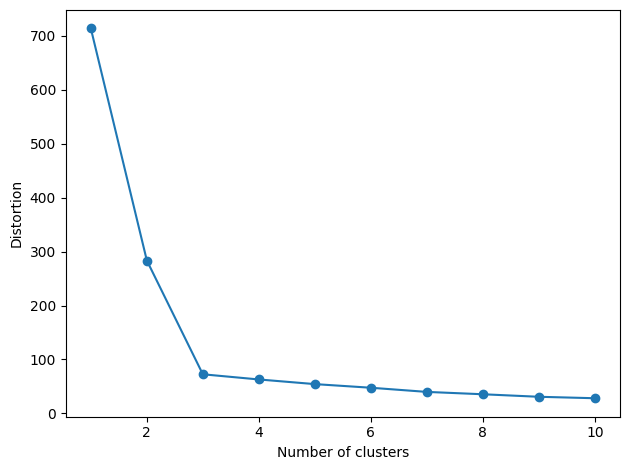

In [7]:
distortions=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()    

In [8]:
km=KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y_km=km.fit_predict(X)


In [10]:
import numpy as np
import pandas as pd
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
X = np.random.random_sample([5, 3])*10
df=pd.DataFrame(X,columns=variables,index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [11]:
from scipy.spatial.distance import pdist,squareform
row_dist=pd.DataFrame(squareform(pdist(df,metric='euclidean')),columns=labels,index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [12]:
from scipy.cluster.hierarchy import linkage
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.

    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.

    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.

    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents the number of

In [13]:
row_clusters=linkage(df.values,method='complete',metric='euclidean')

In [14]:
pd.DataFrame(row_clusters,columns=['row label 1','row label 2','distance','no of items in clust.'],index=[f'cluster {(i+1)}' for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


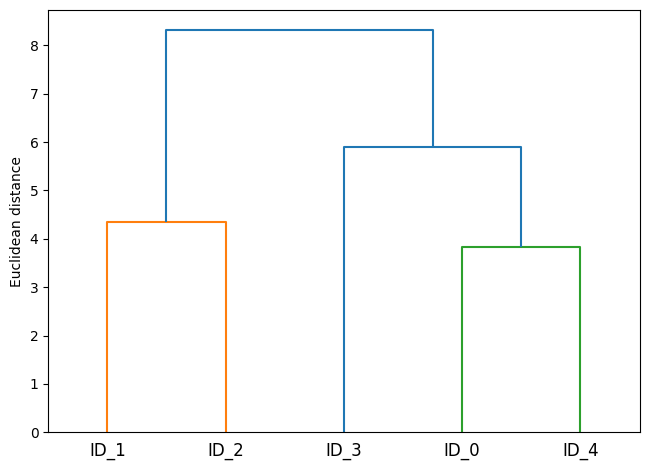

In [15]:
from scipy.cluster.hierarchy import dendrogram
row_dendr=dendrogram(row_clusters,labels=labels,)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

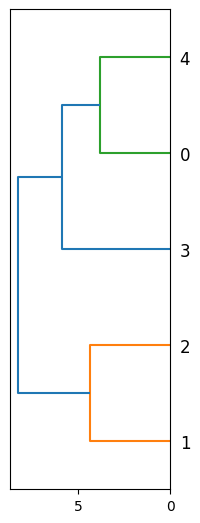

In [16]:
fig=plt.figure(figsize=(8,8),facecolor='white')
axd=fig.add_axes([0.09,0.1,0.2,0.6])
row_dendr=dendrogram(row_clusters,orientation='left')
df_rowclust=df.iloc[row_dendr['leaves'][::-1]]

In [18]:
df_rowclust=df.iloc[row_dendr['leaves'][::-1]]
axm=fig.add_axes([0.23,0.1,0.6,0.6])
cax=axm.matshow(df_rowclust,interpolation='nearest',cmap='hot_r')
plt.show()

In [20]:
from sklearn.cluster import AgglomerativeClustering
ac=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='complete')

labels=ac.fit_predict(X)
print(f'Cluster labels: {labels}')


Cluster labels: [1 0 0 2 1]


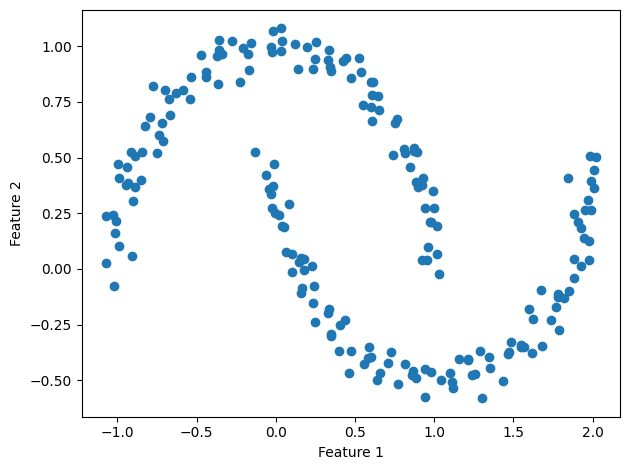

In [21]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200,
noise=0.05,
random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

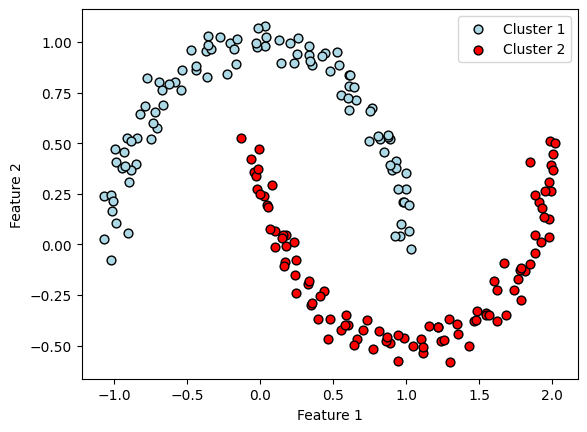

In [23]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.2,min_samples=5,metric='euclidean')
y_db=db.fit_predict(X)
plt.scatter(X[y_db == 0, 0],
X[y_db == 0, 1],

c='lightblue',

edgecolor='black',
marker='o',

s=40,

label='Cluster 1')
plt.scatter(X[y_db == 1, 0],

X[y_db == 1, 1],

c='red',

edgecolor='black',


s=40,

label='Cluster 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.tight_layout
